### Method 01

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return math.sqrt(distance)

In [3]:
def get_neighbors(train, test_row, num_neighbors):
    distances = list()
    for train_row in train:
        dist = euclidean_distance(train_row, test_row)
        distances.append((train_row, dist))
    distances.sort(key=lambda tup: tup[1])
    neighbors = list()
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])
    return neighbors

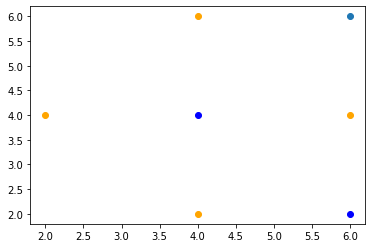

In [4]:
xpos = np.array([4, 6])
ypos = np.array([4, 2])
plt.scatter(xpos, ypos,color='blue')
xneg = np.array([2, 4, 4, 6])
yneg = np.array([4, 6, 2, 4])
plt.scatter(xneg, yneg,color='orange')
x = [6]
y = [6]
plt.scatter(x, y)

In [5]:
train_data = [[2, 4, "Orange"], [4, 4, "Blue"], [4, 6, "Orange"], [4, 2, "Orange"], [6, 2, "Blue"], [6, 4, "Orange"]]
test_data = [[6, 6]]

for item in test_data:
    print("Data point : ", item)
    neighbors = get_neighbors(train_data, item, 3)
    print("Nearest Neighbors : ", neighbors)
    output_values = [row[-1] for row in neighbors]
    prediction = max(set(output_values), key=output_values.count)
    print("Prediction : ", prediction, "\n")

Data point :  [6, 6]
Nearest Neighbors :  [[4, 6, 'Orange'], [6, 4, 'Orange'], [4, 4, 'Blue']]
Prediction :  Orange 



#### Method 02

In [6]:
import math
#from statistics import mode
from scipy.stats import mode

In [7]:
def euclidean_distance(x1,y1,x2,y2):
    return math.sqrt(((x1-x2)**2)+((y1-y2)**2))

In [8]:
def knn(datapoints,query_point,labels,k):
    #Query-point coordinates
    xq=query_point[0][0]
    yq=query_point[0][1]

    #calculate distance of query_point from all datapoints
    #store as (dist,idx)
    distances=[]

    idx=0
    for point in datapoints:
        x=point[0]
        y=point[1]

        dist=euclidean_distance(x,y,xq,yq)

        distances.append((dist,idx))

        idx+=1

    #now get least-k distances
    k_distances=[]

    distances.sort()

    #storing least-k distance in k_distances (dist,idx)
    k_distances=distances[:k]

    print("K-nearest Neighbours with (dist,idx):",k_distances)

    #Get labels of the k-nearest
    k_labels=[]

    for dist,idx in k_distances:
        k_labels.append(labels[idx])

    print("Labels of KNNs:",k_labels)

    #Get mode of k_labels as final_label
    final_label=mode(k_labels)

    print("Final Label:",final_label)

In [9]:
def knn_distance_weighted(datapoints,query_point,labels,k):
    #Query-point coordinates
    xq=query_point[0][0]
    yq=query_point[0][1]

    #calculate distance of query_point from all datapoints
    #store as (dist,idx)
    distances=[]

    idx=0
    for point in datapoints:
        x=point[0]
        y=point[1]

        dist=euclidean_distance(x,y,xq,yq)

        distances.append((dist,idx))

        idx+=1

    #now get least-k distances
    k_distances=[]

    distances.sort()

    #storing least-k distance in k_distances (dist,idx)
    k_distances=distances[:k]

    print("K-nearest Neighbours with (dist,idx):",k_distances)

    #Get labels of the k-nearest
    k_labels=[]

    for dist,idx in k_distances:
        k_labels.append(labels[idx])

    print("Labels of KNNs:",k_labels)

    #Calculate k_weights for each of the k-nearest distances
    k_weights=[]

    for (dist,idx) in k_distances:
        wt=1/dist
        k_weights.append((wt,idx))

    print("K-weights:",k_weights)

    #Now, add weights acc to labels to find maximum
    one_label_weight=0
    zero_label_weight=0

    #go thru all the k_labels,
    # if label is 0, add to zero_label_wt
    # else add to one_label_wt
    for i in range(len(k_labels)):
        if k_labels[i]==0:
            zero_label_weight+=k_weights[i][0]
        else:
            one_label_weight+=k_weights[i][0]

    print("One Label Weight:",one_label_weight)
    print("Zero Label Weight:",zero_label_weight)

    final_label=0

    #Compare both weights and assign final label
    if one_label_weight>=zero_label_weight:
        final_label=1
    else:
        final_label=0

    print("Final Label:", final_label)


In [10]:
#datapoints, labels, query_point
datapoints=[
    (4,2),
    (2,4),
    (6,4),
    (4,6),
    (6,2),
    (4,4),
]

labels=[1,1,1,1,0,0]

query_point=[(6,6)]

In [11]:
print('KNN')
knn(datapoints,query_point,labels,3)

print('KNN-Distance Weighted')
knn_distance_weighted(datapoints,query_point,labels,3)

KNN
K-nearest Neighbours with (dist,idx): [(2.0, 2), (2.0, 3), (2.8284271247461903, 5)]
Labels of KNNs: [1, 1, 0]
Final Label: ModeResult(mode=array([1]), count=array([2]))
KNN-Distance Weighted
K-nearest Neighbours with (dist,idx): [(2.0, 2), (2.0, 3), (2.8284271247461903, 5)]
Labels of KNNs: [1, 1, 0]
K-weights: [(0.5, 2), (0.5, 3), (0.35355339059327373, 5)]
One Label Weight: 1.0
Zero Label Weight: 0.35355339059327373
Final Label: 1
